## Plate generator:

In [1]:
!git clone https://github.com/szad670401/end-to-end-for-chinese-plate-recognition
!cp -r end-to-end-for-chinese-plate-recognition/* ./
!sed 's/for i in range(batchSize):/l_plateStr = []\n        l_plateImg = []\n        for i in range(batchSize):/g' ./genplate.py  | sed 's/cv2.imwrite(outputPath/l_plateStr.append(plateStr)\n                l_plateImg.append(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))\n                #cv2.imwrite(outputPath/g' | sed 's/img);/img);\n        return l_plateStr,l_plateImg/g'  >genplateRev.py

正克隆到 'end-to-end-for-chinese-plate-recognition'...
remote: Enumerating objects: 286, done.
remote: Total 286 (delta 0), reused 0 (delta 0), pack-reused 286
接收对象中: 100% (286/286), 36.80 MiB | 480.00 KiB/s, 完成.
处理 delta 中: 100% (45/45), 完成.


## generate Plate.

In [6]:
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense, Input
from keras.optimizers import Adam
from keras.backend.tensorflow_backend import set_session
from keras.utils.vis_utils import model_to_dot
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

from IPython.display import SVG

from genplate import *

# %matplotlib inline

np.random.seed(5)
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
set_session(tf.Session(config=config))

chars = ["京", "沪", "津", "渝", "冀", "晋", "蒙", "辽", "吉", "黑", "苏", "浙", "皖", "闽", "赣", "鲁", "豫", "鄂", "湘", "粤", "桂",
             "琼", "川", "贵", "云", "藏", "陕", "甘", "青", "宁", "新", "0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "A",
             "B", "C", "D", "E", "F", "G", "H", "J", "K", "L", "M", "N", "P", "Q", "R", "S", "T", "U", "V", "W", "X",
             "Y", "Z"
             ];

M_strIdx = dict(zip(chars, range(len(chars))))

n_generate = 100
rows = 20
cols = int(n_generate/rows)

G = GenPlate("./font/platech.ttf",'./font/platechar.ttf',"./NoPlates")
l_plateStr,l_plateImg = G.genBatch(100,2,range(31,65),"./plate",(272,72))

l_out = []
for i in range(rows):
    l_tmp = []
    for j in range(cols):
        l_tmp.append(l_plateImg[i*cols+j])

    l_out.append(np.hstack(l_tmp))

    fig = plt.figure(figsize=(10, 10))
    ax  = fig.add_subplot(111)
    ax.imshow( np.vstack(l_out), aspect="auto" )

error: OpenCV(4.0.0) /io/opencv/modules/imgproc/src/resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [4]:
from six.moves import xrange
for i in xrange(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [10]:
a = "tian"
print("type of a: {}".format(type(a)))
print("a: {}".format(a))
b = a.encode("utf-8")
print("type of b: {}".format(type(b)))
print("b: {}".format(b))

type of a: <class 'str'>
a: tian
type of b: <class 'bytes'>
b: b'tian'


In [16]:
chars = ["京", "沪", "津", "渝", "冀", "晋", "蒙", "辽", "吉", "黑", "苏", "浙", "皖", "闽", "赣", "鲁", "豫", "鄂", "湘", "粤", "桂",
             "琼", "川", "贵", "云", "藏", "陕", "甘", "青", "宁", "新", "0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "A",
             "B", "C", "D", "E", "F", "G", "H", "J", "K", "L", "M", "N", "P", "Q", "R", "S", "T", "U", "V", "W", "X",
             "Y", "Z"
             ]

M_idxStr = dict(zip(range(len(chars)), chars))
print("data: {}".format(M_idxStr))
a = list(map(lambda x: "".join(M_idxStr[x]), [1, 3]))
print("a: {}".format(a))

data: {0: '京', 1: '沪', 2: '津', 3: '渝', 4: '冀', 5: '晋', 6: '蒙', 7: '辽', 8: '吉', 9: '黑', 10: '苏', 11: '浙', 12: '皖', 13: '闽', 14: '赣', 15: '鲁', 16: '豫', 17: '鄂', 18: '湘', 19: '粤', 20: '桂', 21: '琼', 22: '川', 23: '贵', 24: '云', 25: '藏', 26: '陕', 27: '甘', 28: '青', 29: '宁', 30: '新', 31: '0', 32: '1', 33: '2', 34: '3', 35: '4', 36: '5', 37: '6', 38: '7', 39: '8', 40: '9', 41: 'A', 42: 'B', 43: 'C', 44: 'D', 45: 'E', 46: 'F', 47: 'G', 48: 'H', 49: 'J', 50: 'K', 51: 'L', 52: 'M', 53: 'N', 54: 'P', 55: 'Q', 56: 'R', 57: 'S', 58: 'T', 59: 'U', 60: 'V', 61: 'W', 62: 'X', 63: 'Y', 64: 'Z'}
a: ['沪', '渝']


## predict with model

string dict: {'京': 0, '沪': 1, '津': 2, '渝': 3, '冀': 4, '晋': 5, '蒙': 6, '辽': 7, '吉': 8, '黑': 9, '苏': 10, '浙': 11, '皖': 12, '闽': 13, '赣': 14, '鲁': 15, '豫': 16, '鄂': 17, '湘': 18, '粤': 19, '桂': 20, '琼': 21, '川': 22, '贵': 23, '云': 24, '藏': 25, '陕': 26, '甘': 27, '青': 28, '宁': 29, '新': 30, '0': 31, '1': 32, '2': 33, '3': 34, '4': 35, '5': 36, '6': 37, '7': 38, '8': 39, '9': 40, 'A': 41, 'B': 42, 'C': 43, 'D': 44, 'E': 45, 'F': 46, 'G': 47, 'H': 48, 'J': 49, 'K': 50, 'L': 51, 'M': 52, 'N': 53, 'P': 54, 'Q': 55, 'R': 56, 'S': 57, 'T': 58, 'U': 59, 'V': 60, 'W': 61, 'X': 62, 'Y': 63, 'Z': 64}
plate info: ['吉KAMKL9', '鲁ER0BJ2', '粤B141UE', '津GDH9XH', '鄂LCL43H', '豫MS0P43', '新P8JYMH', '粤LEU8RK', '冀N9A9Y0', '京RZN10F', '苏H5WDDU', '晋QS1G9P', '琼SJ3XWM', '宁ELAN7Y', '苏HLJ2TZ', '冀FAS2SH', '冀HBNRCH', '皖L8G2X7', '沪N47CV4', '湘UXENV2', '云M4MHXC', '川TXA4KW', '渝J3NVV8', '藏QWA5MJ', '甘PA4JWR', '青GRH87G', '粤KQ9ZQA', '桂TVACTT', '皖KUQ8L3', '川GJJTGG', '闽CV3WHH', '琼UFDYXJ', '蒙VYZA9Y', '青HCZ08K', '赣VF5PPE', '浙VE1XRS', '渝

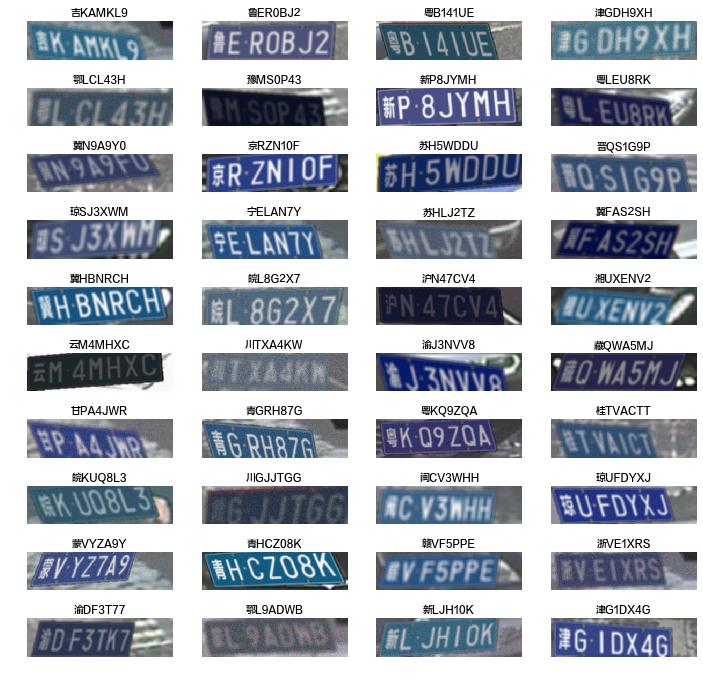

In [2]:
from keras.models import Model, load_model
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense, Input
from keras.optimizers import Adam
from keras.backend.tensorflow_backend import set_session
from keras.utils.vis_utils import model_to_dot
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties


from IPython.display import SVG

from genplate import *

# %matplotlib inline

np.random.seed(5)
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
set_session(tf.Session(config=config))

chars = ["京", "沪", "津", "渝", "冀", "晋", "蒙", "辽", "吉", "黑", "苏", "浙", "皖", "闽", "赣", "鲁", "豫", "鄂", "湘", "粤", "桂",
             "琼", "川", "贵", "云", "藏", "陕", "甘", "青", "宁", "新", "0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "A",
             "B", "C", "D", "E", "F", "G", "H", "J", "K", "L", "M", "N", "P", "Q", "R", "S", "T", "U", "V", "W", "X",
             "Y", "Z"
             ]

M_strIdx = dict(zip(chars, range(len(chars))))
print("string dict: {}".format(M_strIdx))
def show_image():
    n_generate = 100
    rows = 20
    cols = int(n_generate/rows)

    G = GenPlate("./font/platech.ttf",'./font/platechar.ttf',"./NoPlates")
    l_plateStr,l_plateImg = G.genBatch(100,2,range(31,65),"./plate_test_one",(272,72))
    # print("plate string: {}".format(l_plateStr))
    l_out = []
    fig = plt.figure(figsize=(10, 10))
    for i in range(rows):
        l_tmp = []
        for j in range(cols):
            l_tmp.append(l_plateImg[i*cols+j])
        l_out.append(np.hstack(l_tmp))
        # fig = plt.figure(figsize=(10, 10))
        ax  = fig.add_subplot(111)
        ax.imshow( np.vstack(l_out), aspect="auto" )
    plt.show()

def generate_test_img():
    G = GenPlate("./font/platech.ttf",'./font/platechar.ttf',"./NoPlates")
    l_plateStr,l_plateImg = G.genBatch(100,2,range(31,65),"./plate_test_one",(272,72))

def generate_image(batch_size=32):
    while True:
        l_plateStr,l_plateImg = G.genBatch(batch_size,2,range(31,65),"./plate",(272,72))
        X = np.array(l_plateImg, dtype=np.uint8)
        ytmp = np.array(list(map(lambda x: [M_strIdx[a] for a in list(x)], l_plateStr)), dtype=np.uint8)
        y = np.zeros([ytmp.shape[1], batch_size, len(chars)])
        for batch in range(batch_size):
            for idx, row_i in enumerate(ytmp[batch]):
                y[idx, batch, row_i] = 1
        yield X, [yy for yy in y]
def train():
    adam = Adam(lr=0.001)

    input_tensor = Input((72, 272, 3))
    x = input_tensor
    for i in range(3):
        x = Conv2D(32*2**i, (3, 3), activation='relu')(x)
        x = Conv2D(32*2**i, (3, 3), activation='relu')(x)
        x = MaxPool2D(pool_size=(2, 2))(x)

    x = Flatten()(x)
    x = Dropout(0.25)(x)

    n_class = len(chars)
    x = [Dense(n_class, activation='softmax', name='c%d'%(i+1))(x) for i in range(7)]
    model = Model(inputs=input_tensor, outputs=x)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    SVG(model_to_dot(model=model, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg'))

    best_model = ModelCheckpoint('chepai_best.h5', monitor='val_loss', verbose=0, save_best_only=True)
    model.fit_generator(generate_image(32), steps_per_epoch=2000, epochs=5,
                            validation_data=generate_image(32), validation_steps=1280,
                            callbacks=[best_model])
def prediction():
    M_idxStr = dict(zip(range(len(chars)), chars))
    # input_tensor = Input((72, 272, 3))
    # x = input_tensor
    # for i in range(3):
    #     x = Conv2D(32*2**i, (3, 3), activation='relu')(x)
    #     x = Conv2D(32*2**i, (3, 3), activation='relu')(x)
    #     x = MaxPool2D(pool_size=(2, 2))(x)

    # x = Flatten()(x)
    # x = Dropout(0.25)(x)

    # n_class = len(chars)
    # x = [Dense(n_class, activation='softmax', name='c%d'%(i+1))(x) for i in range(7)]
    # model = Model(inputs=input_tensor, outputs=x)
    model = load_model("chepai_best.h5")
    G = GenPlate("./font/platech.ttf",'./font/platechar.ttf',"./NoPlates")
    l_plateStr,l_plateImg = G.genBatch(40,2,range(31,65),"./plate_test_predict",(272,72))
    myfont = FontProperties(fname="./font/Lantinghei.ttc")
    fig = plt.figure(figsize=(12, 12))
    result = [np.argmax(result) for result in model.predict(np.array(l_plateImg))]
    # print("predict result: {}".format(result))
    l_titles = list(map(lambda x: "".join([M_idxStr[xx] for xx in x]), np.argmax(np.array(model.predict( np.array(l_plateImg) )), 2).T))
    # l_titles = list(map(lambda x: "".join(M_idxStr[x]), result))
    print("plate info: {}".format(l_titles))
    for idx, img in enumerate(l_plateImg[0:40]):
        ax = fig.add_subplot(10, 4, idx+1)
        ax.imshow(img)
        ax.set_title(l_titles[idx], fontproperties=myfont)
        ax.set_axis_off()
    plt.show()

if __name__ == "__main__":
    # train()
    prediction()

In [24]:
import os
from os.path import join
import time
import tensorflow as tf
tf.reset_default_graph()
image_file_path = "./plate_images"
images_name = os.listdir(image_file_path)
# print("images name: {}".format(images_name))
'''images relative path'''
images_path = [os.path.join(image_file_path, image_name) for image_name in images_name]
# print("images relative path: {}".format(images_path))
'''resized images path'''
resize_images_path = "./resize_images"
'''read image'''
img_bytes = tf.read_file(images_path[0])
img_decode = tf.image.decode_jpeg(img_bytes)
print("image decode type: {}".format(img_decode.dtype))
if not os.path.exists(resize_images_path):
    os.makedirs(resize_images_path)

resize_images = tf.image.resize_images(img_decode, [72, 272], method=1)
# if __name__ == "__main__":
#     with tf.Session() as sess:
#         resize_images = sess.run(resize_images)
#         plt.figure()
#         plt.imshow(resize_images)
# #         plt.show()

def parse_function(filenames):
    img_bytes = tf.read_file(filenames)
    img_decode = tf.image.decode_jpeg(img_bytes, channels=3)
    return img_decode

images_rgb = []
def reshape_image(image_path, sess):
    '''Reshape image to specify size.

    :params image_path: source image path
    :params sess: tensorflow Session

    return:
    image_rgb: image rgb information
    '''
    imgs_name = os.listdir(image_path)
    png = imgs_name[0].lower().endswith("png")
    imgs_path = [join(image_path, f) for f in imgs_name]
    imgs_num = len(imgs_path)
    imgs_queue = tf.data.Dataset.from_tensor_slices(imgs_path)
    imgs_map = imgs_queue.map(parse_function)
    img_decode = imgs_map.make_one_shot_iterator().get_next()
    for i in range(imgs_num):
        img_type = img_decode.dtype
        if img_decode.dtype != tf.float32:
            img_decode = tf.image.convert_image_dtype(img_decode, dtype=tf.float32)
        img_decode = tf.image.resize_images(img_decode, [72, 272], method=0)
        if img_decode.dtype == tf.float32:
            img_decode = tf.image.convert_image_dtype(img_decode, dtype=tf.uint8)

        img_value = sess.run(img_decode)
        images_rgb.append(img_value)
        # img_shape = img_value.shape
    return images_rgb

# def reshape_image(image_path, save_path, max_number, sess):
#     '''Reshape image to specify size.

#     :params image_path: source image path
#     :params sess: tensorflow Session

#     return:
#     image_rgb: image rgb information
#     '''
# #     images_rgb = []
#     imgs_name = os.listdir(image_path)
#     png = imgs_name[0].lower().endswith("png")
#     imgs_path = [join(image_path, f) for f in imgs_name]
#     imgs_num = len(imgs_path)
#     imgs_queue = tf.data.Dataset.from_tensor_slices(imgs_path)
#     imgs_map = imgs_queue.map(parse_function)
#     img_decode = imgs_map.make_one_shot_iterator().get_next()
#     for i in range(imgs_num):
#         img_type = img_decode.dtype
#         if img_decode.dtype != tf.float32:
#             img_decode = tf.image.convert_image_dtype(img_decode, dtype=tf.float32)
#         img_decode = tf.image.resize_images(img_decode, [128, 128], method=0)
#         if img_decode.dtype == tf.float32:
#             img_decode = tf.image.convert_image_dtype(img_decode, dtype=tf.uint8)
#         img_value = sess.run(img_decode)
# #         images_rgb.append(img_value)
#         plt.figure(figsize=(1.28, 1.28))
#         plt.imshow(img_value)
#         plt.axis("off")
#         plt.savefig(save_path+"/{}.jpg".format(max_number+i+1), format="jpg")
#         print("Processing {} image.".format(max_number+i+1))
#         plt.close("all")


with tf.Session() as sess:
    start_time = time.time()
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)
    image_path = "./plate_images"
    # image_path = "./data/images"
    # image_path = "./data/images_mini"
    imgs_rgb = reshape_image(image_path, sess)
    imgs_num = len(images_rgb)
    if not os.path.exists("./plate_resized"):
        os.makedirs("./plate_resized")
    print("images number: {}".format(imgs_num))
    for i in range(imgs_num):
#         fig = plt.figure(figsize=(1.28, 1.28))
        plt.figure(figsize=(2.72, 0.72))
        # fig = plt.gcf()
        # plt.imshow(imgs_value[:,:,0], cmap="Greys_r")
        plt.imshow(imgs_rgb[i])
        plt.axis("off")
        plt.savefig("./plate_resized/{}.jpg".format(i+1), format="jpg")
        # plt.show()
        # plt.close(fig)
        plt.close("all")
        print("{} image has been saved.".format(i+1))


image decode type: <dtype: 'uint8'>
images number: 150
1 image has been saved.
2 image has been saved.
3 image has been saved.
4 image has been saved.
5 image has been saved.
6 image has been saved.
7 image has been saved.
8 image has been saved.
9 image has been saved.
10 image has been saved.
11 image has been saved.
12 image has been saved.
13 image has been saved.
14 image has been saved.
15 image has been saved.
16 image has been saved.
17 image has been saved.
18 image has been saved.
19 image has been saved.
20 image has been saved.
21 image has been saved.
22 image has been saved.
23 image has been saved.
24 image has been saved.
25 image has been saved.
26 image has been saved.
27 image has been saved.
28 image has been saved.
29 image has been saved.
30 image has been saved.
31 image has been saved.
32 image has been saved.
33 image has been saved.
34 image has been saved.
35 image has been saved.
36 image has been saved.
37 image has been saved.
38 image has been saved.
39 i

## predict with model in real images

string dict: {'京': 0, '沪': 1, '津': 2, '渝': 3, '冀': 4, '晋': 5, '蒙': 6, '辽': 7, '吉': 8, '黑': 9, '苏': 10, '浙': 11, '皖': 12, '闽': 13, '赣': 14, '鲁': 15, '豫': 16, '鄂': 17, '湘': 18, '粤': 19, '桂': 20, '琼': 21, '川': 22, '贵': 23, '云': 24, '藏': 25, '陕': 26, '甘': 27, '青': 28, '宁': 29, '新': 30, '0': 31, '1': 32, '2': 33, '3': 34, '4': 35, '5': 36, '6': 37, '7': 38, '8': 39, '9': 40, 'A': 41, 'B': 42, 'C': 43, 'D': 44, 'E': 45, 'F': 46, 'G': 47, 'H': 48, 'J': 49, 'K': 50, 'L': 51, 'M': 52, 'N': 53, 'P': 54, 'Q': 55, 'R': 56, 'S': 57, 'T': 58, 'U': 59, 'V': 60, 'W': 61, 'X': 62, 'Y': 63, 'Z': 64}


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

plate info: ['吉KAMKL9', '吉ZJWCW1', '晋NDF78B', '粤WM0PY1', '鲁B57709', '粤WKTECH', '津BS995X', '黑B99999', '鲁ER0BJ2', '粤WLR5UL', '晋HW0888']


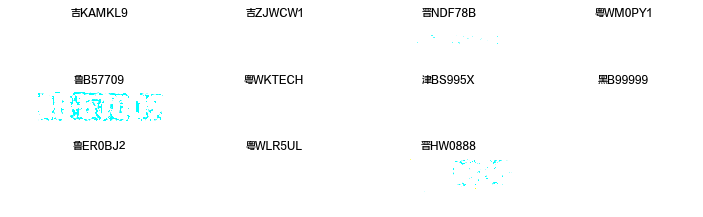

In [72]:
from keras.models import Model, load_model
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense, Input
from keras.optimizers import Adam
from keras.backend.tensorflow_backend import set_session
from keras.utils.vis_utils import model_to_dot
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
tf.reset_default_graph()


from IPython.display import SVG

from genplate import *

# %matplotlib inline

np.random.seed(5)
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
set_session(tf.Session(config=config))

chars = ["京", "沪", "津", "渝", "冀", "晋", "蒙", "辽", "吉", "黑", "苏", "浙", "皖", "闽", "赣", "鲁", "豫", "鄂", "湘", "粤", "桂",
             "琼", "川", "贵", "云", "藏", "陕", "甘", "青", "宁", "新", "0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "A",
             "B", "C", "D", "E", "F", "G", "H", "J", "K", "L", "M", "N", "P", "Q", "R", "S", "T", "U", "V", "W", "X",
             "Y", "Z"
             ]

M_strIdx = dict(zip(chars, range(len(chars))))
print("string dict: {}".format(M_strIdx))
def show_image():
    n_generate = 100
    rows = 20
    cols = int(n_generate/rows)

    G = GenPlate("./font/platech.ttf",'./font/platechar.ttf',"./NoPlates")
    l_plateStr,l_plateImg = G.genBatch(100,2,range(31,65),"./plate_test_one",(272,72))
    # print("plate string: {}".format(l_plateStr))
    l_out = []
    fig = plt.figure(figsize=(10, 10))
    for i in range(rows):
        l_tmp = []
        for j in range(cols):
            l_tmp.append(l_plateImg[i*cols+j])
        l_out.append(np.hstack(l_tmp))
        # fig = plt.figure(figsize=(10, 10))
        ax  = fig.add_subplot(111)
        ax.imshow( np.vstack(l_out), aspect="auto" )
    plt.show()

def generate_test_img():
    G = GenPlate("./font/platech.ttf",'./font/platechar.ttf',"./NoPlates")
    l_plateStr,l_plateImg = G.genBatch(100,2,range(31,65),"./plate_test_one",(272,72))

def generate_image(batch_size=32):
    while True:
        l_plateStr,l_plateImg = G.genBatch(batch_size,2,range(31,65),"./plate",(272,72))
        X = np.array(l_plateImg, dtype=np.uint8)
        ytmp = np.array(list(map(lambda x: [M_strIdx[a] for a in list(x)], l_plateStr)), dtype=np.uint8)
        y = np.zeros([ytmp.shape[1], batch_size, len(chars)])
        for batch in range(batch_size):
            for idx, row_i in enumerate(ytmp[batch]):
                y[idx, batch, row_i] = 1
        yield X, [yy for yy in y]
def train():
    adam = Adam(lr=0.001)

    input_tensor = Input((72, 272, 3))
    x = input_tensor
    for i in range(3):
        x = Conv2D(32*2**i, (3, 3), activation='relu')(x)
        x = Conv2D(32*2**i, (3, 3), activation='relu')(x)
        x = MaxPool2D(pool_size=(2, 2))(x)

    x = Flatten()(x)
    x = Dropout(0.25)(x)

    n_class = len(chars)
    x = [Dense(n_class, activation='softmax', name='c%d'%(i+1))(x) for i in range(7)]
    model = Model(inputs=input_tensor, outputs=x)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    SVG(model_to_dot(model=model, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg'))

    best_model = ModelCheckpoint('chepai_best.h5', monitor='val_loss', verbose=0, save_best_only=True)
    model.fit_generator(generate_image(32), steps_per_epoch=2000, epochs=5,
                            validation_data=generate_image(32), validation_steps=1280,
                            callbacks=[best_model])
    
def read_image(images_path,image_h, image_w, sess):
    '''Read image with tensorflow.
    
    :params images_path: image relateive or absolute path
    Returns:
    images_data: image data list
    '''
    images_data = []
    images_name = os.listdir(images_path)
    images_relative_path = [os.path.join(images_path, image_name) for image_name in images_name]
    for image in images_relative_path:
        png = image.lower().endswith("png")
        img_bytes = tf.read_file(image)
        img_decode = tf.image.decode_png(img_bytes) if png else tf.image.decode_jpeg(img_bytes)
#         if img_decode.dtype != tf.float32:
#             img_decode = tf.image.convert_image_dtype(img_decode, dtype=tf.float32)
        img_value = sess.run(img_decode)
        image_shape = img_value.shape
        if image_shape[0] != image_h | image_shape[1] != image_w:
            
            image_resize = tf.image.resize_images(img_decode, [image_h, image_w], method=3)
#             image_resize = tf.image.convert_image_dtype(image_resize, dtype=tf.uint8)
            img_value = sess.run(image_resize)
#         print("images shape: {}".format(img_value.shape))
        images_data.append(img_value)
    return images_data
        
    
    
def prediction(images_path, sess):
    M_idxStr = dict(zip(range(len(chars)), chars))
    # input_tensor = Input((72, 272, 3))
    # x = input_tensor
    # for i in range(3):
    #     x = Conv2D(32*2**i, (3, 3), activation='relu')(x)
    #     x = Conv2D(32*2**i, (3, 3), activation='relu')(x)
    #     x = MaxPool2D(pool_size=(2, 2))(x)

    # x = Flatten()(x)
    # x = Dropout(0.25)(x)
    # n_class = len(chars)
    # x = [Dense(n_class, activation='softmax', name='c%d'%(i+1))(x) for i in range(7)]
    # model = Model(inputs=input_tensor, outputs=x)
    model = load_model("chepai_best.h5")
#     G = GenPlate("./font/platech.ttf",'./font/platechar.ttf',"./NoPlates")
#     l_plateStr,l_plateImg = G.genBatch(2,2,range(31,65),"./plate_test_predict",(272,72))
    images_name = os.listdir(images_path)
    l_plateImg = None
    l_plateImg = read_image(images_path, 72, 272, sess)
#     print("plate image: {}".format(l_plateImg))
    myfont = FontProperties(fname="./font/Lantinghei.ttc")
    fig = plt.figure(figsize=(12, 12))
    result = [np.argmax(result) for result in model.predict(np.array(l_plateImg))]
    # print("predict result: {}".format(result))
    l_titles = list(map(lambda x: "".join([M_idxStr[xx] for xx in x]), np.argmax(np.array(model.predict( np.array(l_plateImg) )), 2).T))
    # l_titles = list(map(lambda x: "".join(M_idxStr[x]), result))
    print("plate info: {}".format(l_titles))
    for idx, img in enumerate(l_plateImg[0:40]):
        ax = fig.add_subplot(10, 4, idx+1)
        ax.imshow(img)
        ax.set_title(l_titles[idx], fontproperties=myfont)
        ax.set_axis_off()
    plt.show()

if __name__ == "__main__":
    # train()
    with tf.Session() as sess:
#         images_path = "./test_images_for_resize"
#         images_path = "./plate_resized"
#         images_path = "./plate_test_predict"
        images_path = "./generate_plate_for_validation"
        prediction(images_path, sess)

string dict: {'京': 0, '沪': 1, '津': 2, '渝': 3, '冀': 4, '晋': 5, '蒙': 6, '辽': 7, '吉': 8, '黑': 9, '苏': 10, '浙': 11, '皖': 12, '闽': 13, '赣': 14, '鲁': 15, '豫': 16, '鄂': 17, '湘': 18, '粤': 19, '桂': 20, '琼': 21, '川': 22, '贵': 23, '云': 24, '藏': 25, '陕': 26, '甘': 27, '青': 28, '宁': 29, '新': 30, '0': 31, '1': 32, '2': 33, '3': 34, '4': 35, '5': 36, '6': 37, '7': 38, '8': 39, '9': 40, 'A': 41, 'B': 42, 'C': 43, 'D': 44, 'E': 45, 'F': 46, 'G': 47, 'H': 48, 'J': 49, 'K': 50, 'L': 51, 'M': 52, 'N': 53, 'P': 54, 'Q': 55, 'R': 56, 'S': 57, 'T': 58, 'U': 59, 'V': 60, 'W': 61, 'X': 62, 'Y': 63, 'Z': 64}
image shape: (72, 272, 3)
image shape: (72, 272, 3)
image shape: (72, 272, 3)
image shape: (72, 272, 3)
image shape: (72, 272, 3)
image shape: (72, 272, 3)
image shape: (72, 272, 3)
image shape: (72, 272, 3)
image shape: (72, 272, 3)
image shape: (72, 272, 3)
image shape: (72, 272, 3)
image shape: (72, 272, 3)
image shape: (72, 272, 3)
image shape: (72, 272, 3)
plate info: ['吉KAMKL9', '吉ZJWCW1', '新YD778B', '

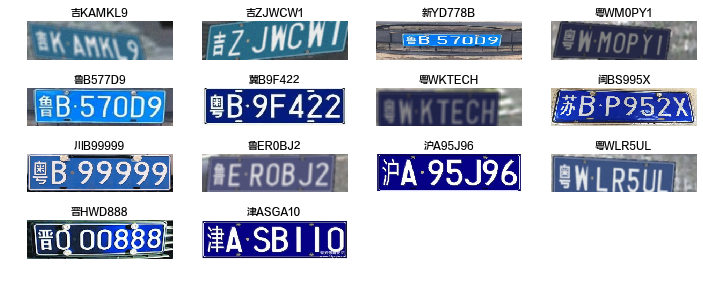

In [89]:
from keras.models import Model, load_model
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense, Input
from keras.optimizers import Adam
from keras.backend.tensorflow_backend import set_session
from keras.utils.vis_utils import model_to_dot
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
tf.reset_default_graph()


from IPython.display import SVG

from genplate import *

# %matplotlib inline

np.random.seed(5)
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
set_session(tf.Session(config=config))

chars = ["京", "沪", "津", "渝", "冀", "晋", "蒙", "辽", "吉", "黑", "苏", "浙", "皖", "闽", "赣", "鲁", "豫", "鄂", "湘", "粤", "桂",
             "琼", "川", "贵", "云", "藏", "陕", "甘", "青", "宁", "新", "0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "A",
             "B", "C", "D", "E", "F", "G", "H", "J", "K", "L", "M", "N", "P", "Q", "R", "S", "T", "U", "V", "W", "X",
             "Y", "Z"
             ]

M_strIdx = dict(zip(chars, range(len(chars))))
print("string dict: {}".format(M_strIdx))
def show_image():
    n_generate = 100
    rows = 20
    cols = int(n_generate/rows)

    G = GenPlate("./font/platech.ttf",'./font/platechar.ttf',"./NoPlates")
    l_plateStr,l_plateImg = G.genBatch(100,2,range(31,65),"./plate_test_one",(272,72))
    # print("plate string: {}".format(l_plateStr))
    l_out = []
    fig = plt.figure(figsize=(10, 10))
    for i in range(rows):
        l_tmp = []
        for j in range(cols):
            l_tmp.append(l_plateImg[i*cols+j])
        l_out.append(np.hstack(l_tmp))
        # fig = plt.figure(figsize=(10, 10))
        ax  = fig.add_subplot(111)
        ax.imshow( np.vstack(l_out), aspect="auto" )
    plt.show()

def generate_test_img():
    G = GenPlate("./font/platech.ttf",'./font/platechar.ttf',"./NoPlates")
    l_plateStr,l_plateImg = G.genBatch(100,2,range(31,65),"./plate_test_one",(272,72))

def generate_image(batch_size=32):
    while True:
        l_plateStr,l_plateImg = G.genBatch(batch_size,2,range(31,65),"./plate",(272,72))
        X = np.array(l_plateImg, dtype=np.uint8)
        ytmp = np.array(list(map(lambda x: [M_strIdx[a] for a in list(x)], l_plateStr)), dtype=np.uint8)
        y = np.zeros([ytmp.shape[1], batch_size, len(chars)])
        for batch in range(batch_size):
            for idx, row_i in enumerate(ytmp[batch]):
                y[idx, batch, row_i] = 1
        yield X, [yy for yy in y]
def train():
    adam = Adam(lr=0.001)

    input_tensor = Input((72, 272, 3))
    x = input_tensor
    for i in range(3):
        x = Conv2D(32*2**i, (3, 3), activation='relu')(x)
        x = Conv2D(32*2**i, (3, 3), activation='relu')(x)
        x = MaxPool2D(pool_size=(2, 2))(x)

    x = Flatten()(x)
    x = Dropout(0.25)(x)

    n_class = len(chars)
    x = [Dense(n_class, activation='softmax', name='c%d'%(i+1))(x) for i in range(7)]
    model = Model(inputs=input_tensor, outputs=x)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    SVG(model_to_dot(model=model, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg'))

    best_model = ModelCheckpoint('chepai_best.h5', monitor='val_loss', verbose=0, save_best_only=True)
    model.fit_generator(generate_image(32), steps_per_epoch=2000, epochs=5,
                            validation_data=generate_image(32), validation_steps=1280,
                            callbacks=[best_model])
    
def read_image(images_path,image_h, image_w, sess):
    '''Read image with tensorflow.
    
    :params images_path: image relateive or absolute path
    Returns:
    images_data: image data list
    '''
    images_data = []
    images_name = os.listdir(images_path)
    images_relative_path = [os.path.join(images_path, image_name) for image_name in images_name]
    for image in images_relative_path:
        png = image.lower().endswith("png")
        img_bytes = tf.read_file(image)
        img_decode = tf.image.decode_png(img_bytes) if png else tf.image.decode_jpeg(img_bytes)
#         if img_decode.dtype != tf.float32:
#             img_decode = tf.image.convert_image_dtype(img_decode, dtype=tf.float32)
        img_value = sess.run(img_decode)
        image_shape = img_value.shape
        if image_shape[0] != image_h | image_shape[1] != image_w:
            
            image_resize = tf.image.resize_images(img_decode, [image_h, image_w], method=1)
#             image_resize = tf.image.convert_image_dtype(image_resize, dtype=tf.uint8)
            img_value = sess.run(image_resize)
#         print("images shape: {}".format(img_value.shape))
        images_data.append(img_value)
    return images_data
        
def opencv_read_image(images_path,image_h, image_w):
    '''Read image with tensorflow.
    
    :params images_path: image relateive or absolute path
    Returns:
    images_data: image data list
    '''
    images_data = []
    images_name = os.listdir(images_path)
    images_relative_path = [os.path.join(images_path, image_name) for image_name in images_name]
    for image in images_relative_path:
        img_value = cv2.imread(image)
        image_shape = img_value.shape
        if image_shape[0] != image_h | image_shape[1] != image_w:
            img_value = cv2.resize(img_value, (image_w, image_h))
        images_data.append(cv2.cvtColor(img_value, cv2.COLOR_BGR2RGB))
        
#         print("image value: {}".format(img_value))
        print("image shape: {}".format(img_value.shape))
    return images_data    
    
def prediction(images_path, sess):
    M_idxStr = dict(zip(range(len(chars)), chars))
    # input_tensor = Input((72, 272, 3))
    # x = input_tensor
    # for i in range(3):
    #     x = Conv2D(32*2**i, (3, 3), activation='relu')(x)
    #     x = Conv2D(32*2**i, (3, 3), activation='relu')(x)
    #     x = MaxPool2D(pool_size=(2, 2))(x)

    # x = Flatten()(x)
    # x = Dropout(0.25)(x)
    # n_class = len(chars)
    # x = [Dense(n_class, activation='softmax', name='c%d'%(i+1))(x) for i in range(7)]
    # model = Model(inputs=input_tensor, outputs=x)
    model = load_model("chepai_best.h5")
#     G = GenPlate("./font/platech.ttf",'./font/platechar.ttf',"./NoPlates")
#     l_plateStr,l_plateImg = G.genBatch(2,2,range(31,65),"./plate_test_predict",(272,72))
    images_name = os.listdir(images_path)
    l_plateImg = None
#     l_plateImg = read_image(images_path, 72, 272, sess)
    l_plateImg = opencv_read_image(images_path, 72, 272)
#     print("plate image: {}".format(l_plateImg))
    myfont = FontProperties(fname="./font/Lantinghei.ttc")
    fig = plt.figure(figsize=(12, 12))
    result = [np.argmax(result) for result in model.predict(np.array(l_plateImg))]
    # print("predict result: {}".format(result))
    l_titles = list(map(lambda x: "".join([M_idxStr[xx] for xx in x]), np.argmax(np.array(model.predict( np.array(l_plateImg) )), 2).T))
    # l_titles = list(map(lambda x: "".join(M_idxStr[x]), result))
    print("plate info: {}".format(l_titles))
    for idx, img in enumerate(l_plateImg[0:40]):
        ax = fig.add_subplot(10, 4, idx+1)
        ax.imshow(img)
        ax.set_title(l_titles[idx], fontproperties=myfont)
        ax.set_axis_off()
    plt.show()

if __name__ == "__main__":
    # train()
    with tf.Session() as sess:
#         images_path = "./test_images_for_resize"
#         images_path = "./plate_resized"
#         images_path = "./plate_test_predict"
        images_path = "./generate_plate_for_validation"
        prediction(images_path, sess)

In [61]:
a = 250.343434
print("data: {:.2}".format(a))

data: 2.5e+02


images shape: (72, 272, 3)
images shape: (72, 272, 3)
images shape: (72, 272, 3)
images shape: (72, 272, 3)


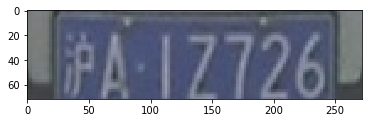

In [82]:
def read_image(images_path,image_h, image_w, sess):
    '''Read image with tensorflow.
    
    :params images_path: image relateive or absolute path
    Returns:
    images_data: image data list
    '''
    images_data = []
    images_name = os.listdir(images_path)
    images_relative_path = [os.path.join(images_path, image_name) for image_name in images_name]
    for image in images_relative_path:
        png = image.lower().endswith("png")
        img_bytes = tf.read_file(image)
        img_decode = tf.image.decode_png(img_bytes) if png else tf.image.decode_jpeg(img_bytes)
        img_value = sess.run(img_decode)
        image_shape = img_value.shape
        if image_shape[0] != image_h | image_shape[1] != image_w:
            image_resize = tf.image.resize_images(img_decode, [image_h, image_w], method=1)
            img_value = sess.run(image_resize)
        print("images shape: {}".format(img_value.shape))
        images_data.append(img_value)
    return images_data
if __name__ == "__main__":
    with tf.Session() as sess:
        images_value = None
        image_path = "./test_images_for_resize"
        images_value = read_image(image_path, 72, 272, sess)
        plt.figure()
        plt.imshow(images_value[0])
        plt.show()
#         print("images data: {}".format(images_value[0]))

image shape: (72, 272, 3)
image shape: (72, 272, 3)
image shape: (72, 272, 3)
image shape: (72, 272, 3)


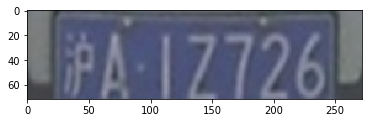

In [83]:
import cv2
import matplotlib.pyplot as plt

def opencv_read_image(images_path,image_h, image_w):
    '''Read image with tensorflow.
    
    :params images_path: image relateive or absolute path
    Returns:
    images_data: image data list
    '''
    images_data = []
    images_name = os.listdir(images_path)
    images_relative_path = [os.path.join(images_path, image_name) for image_name in images_name]
    for image in images_relative_path:
        img_value = cv2.imread(image)
        image_shape = img_value.shape
        if image_shape[0] != image_h | image_shape[1] != image_w:
            img_value = cv2.resize(img_value, (image_w, image_h))
        images_data.append(cv2.cvtColor(img_value, cv2.COLOR_BGR2RGB))
        
#         print("image value: {}".format(img_value))
        print("image shape: {}".format(img_value.shape))
    return images_data
if __name__ == "__main__":
    image_path = "./test_images_for_resize"
    images_value = opencv_read_image(image_path, 72, 272)
    plt.figure()
    plt.imshow(images_value[0])
    plt.show()
#     print("image value: {}".format(images_value[0]))
  